In [12]:
#librerias para el desarrollo del proyecto
import matplotlib.pyplot as plt #libreria para graficas
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from matplotlib.ticker import StrMethodFormatter
import seaborn as sb

#librerias pandas para el manejo de los datos
import pandas as pd
import pandas as pq
import pandas as pf
import pandas as filtro_filas

#enlazando los datos en el archivo excel
data = pd.read_csv("hola..csv",index_col=None)
import numpy as np
#invocando a la libreria de clasificacion
from sklearn.naive_bayes import GaussianNB

In [14]:
data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [16]:
data.shape

(480, 17)

In [29]:
data.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [35]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [18]:
#Columnas con missing
null_columns=data.columns[data.isnull().any()]

print(null_columns)

Index([], dtype='object')


<Axes: >

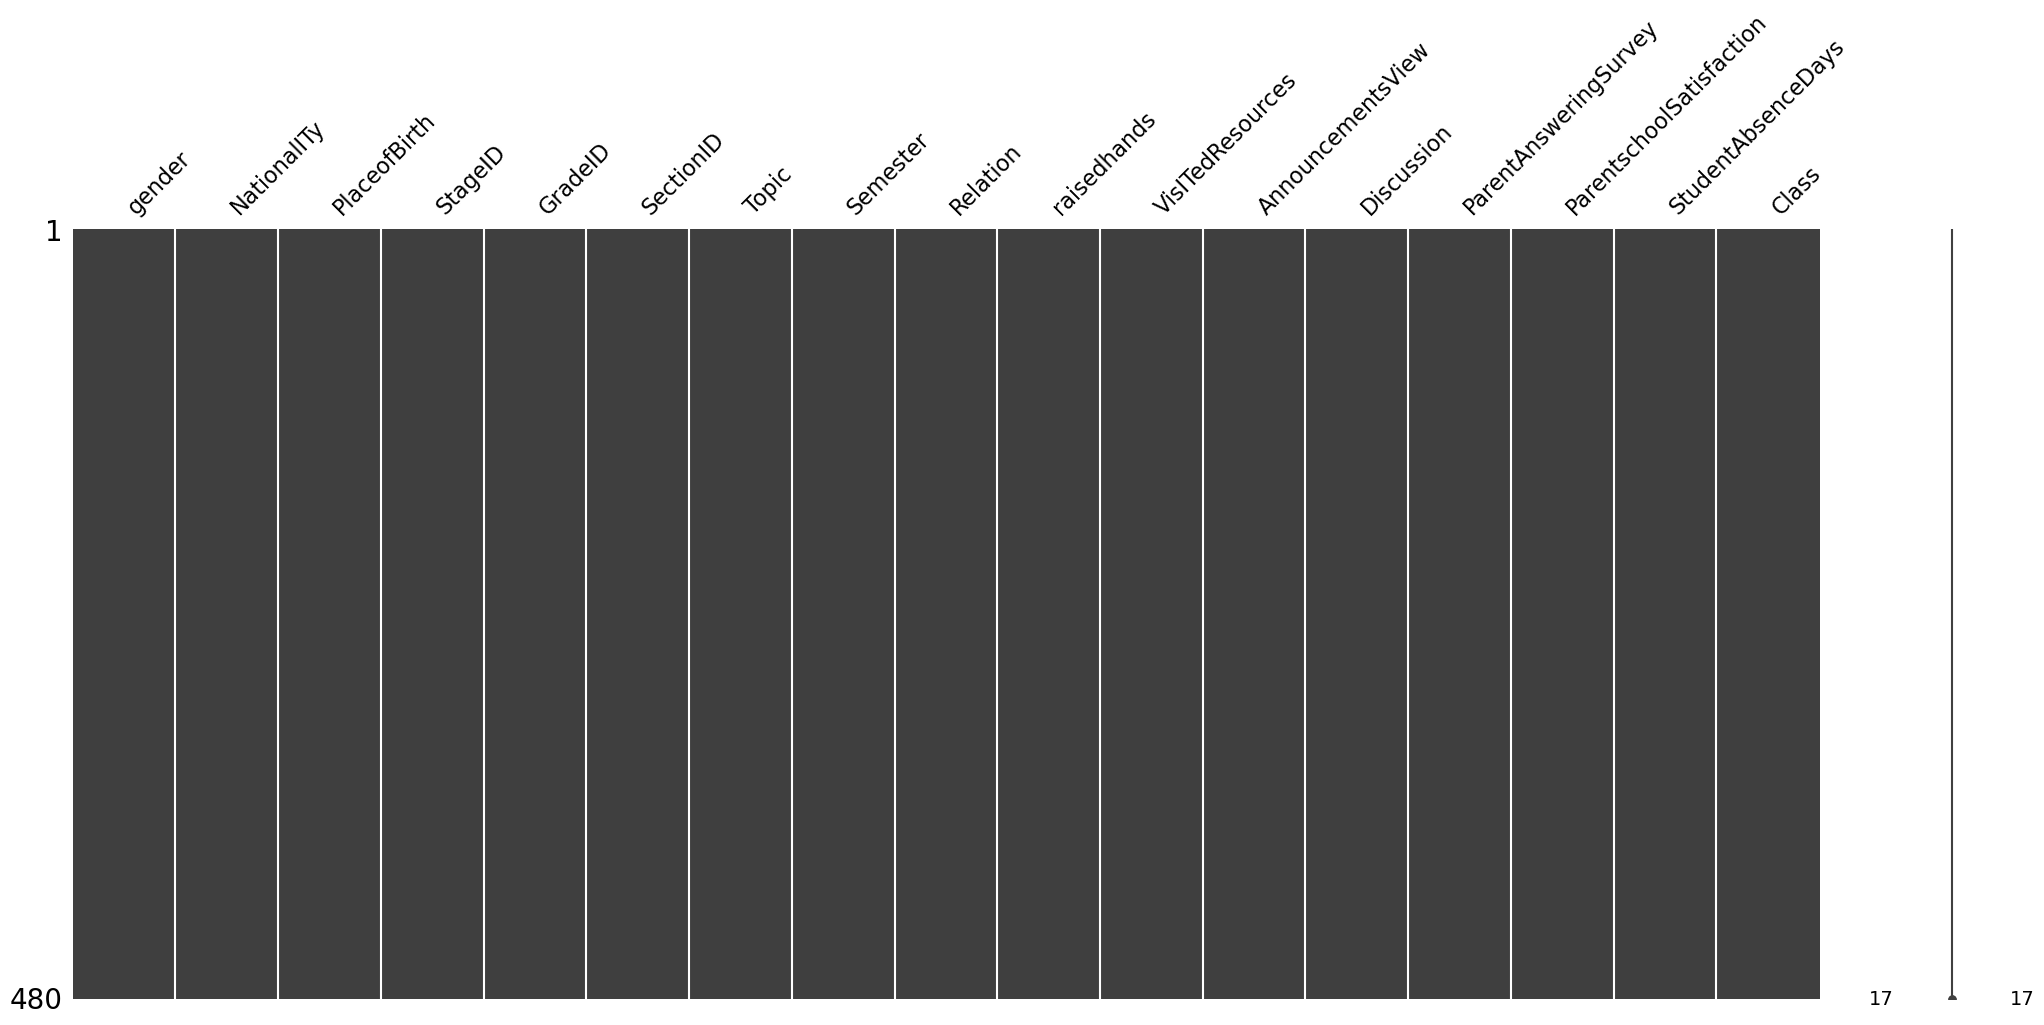

In [20]:
import missingno as msno
msno.matrix(data) 

In [22]:
# captura el numero de filas y columnas
rows = len(data.axes[0])
cols = len(data.axes[1])

# Imprimir el numero de filas y columnas
print("Numero de filas: " + str(rows))
print("Numero de columnas: " + str(cols))

Numero de filas: 480
Numero de columnas: 17


In [24]:
data.isnull().any()

gender                      False
NationalITy                 False
PlaceofBirth                False
StageID                     False
GradeID                     False
SectionID                   False
Topic                       False
Semester                    False
Relation                    False
raisedhands                 False
VisITedResources            False
AnnouncementsView           False
Discussion                  False
ParentAnsweringSurvey       False
ParentschoolSatisfaction    False
StudentAbsenceDays          False
Class                       False
dtype: bool

In [13]:
#score = clf.score(X_train,y_train)

#https://www.aprendemachinelearning.com/sets-de-entrenamiento-test-validacion-cruzada/

In [41]:
#verificamos la edad de las personas para ver si estan dentro del rango
print(data.groupby('NationalITy').size())

NationalITy
Egypt            9
Iran             6
Iraq            22
Jordan         172
KW             179
Lybia            6
Morocco          4
Palestine       28
SaudiArabia     11
Syria            7
Tunis           12
USA              6
lebanon         17
venzuela         1
dtype: int64


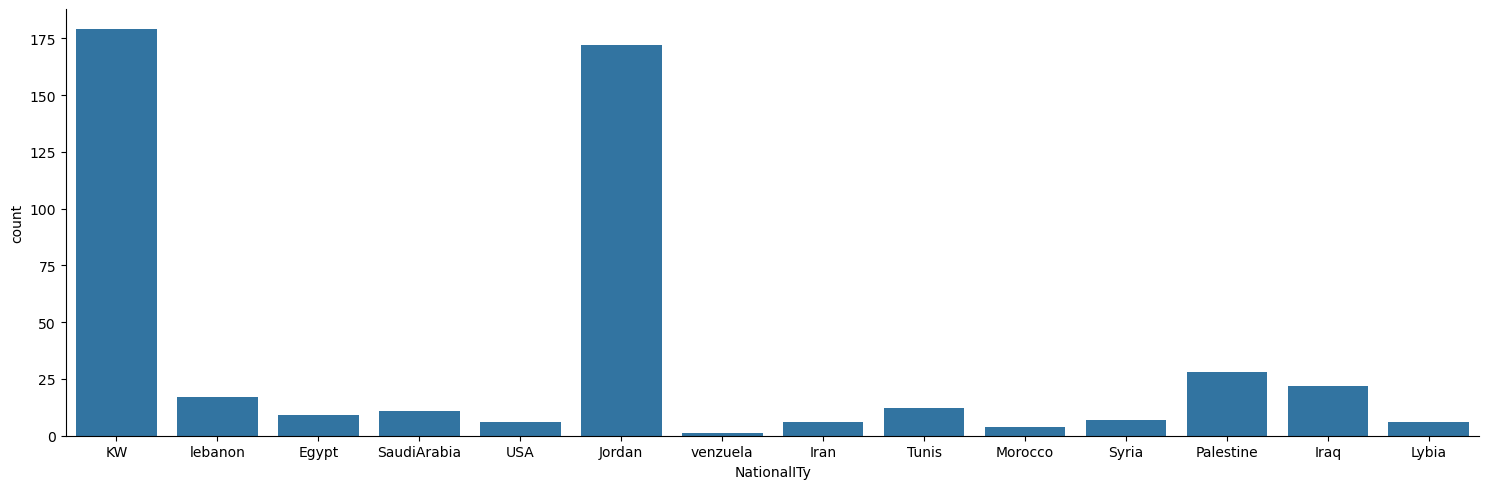

In [26]:
import seaborn as sns

sns.catplot(x='NationalITy', data=data, kind="count", aspect=3)



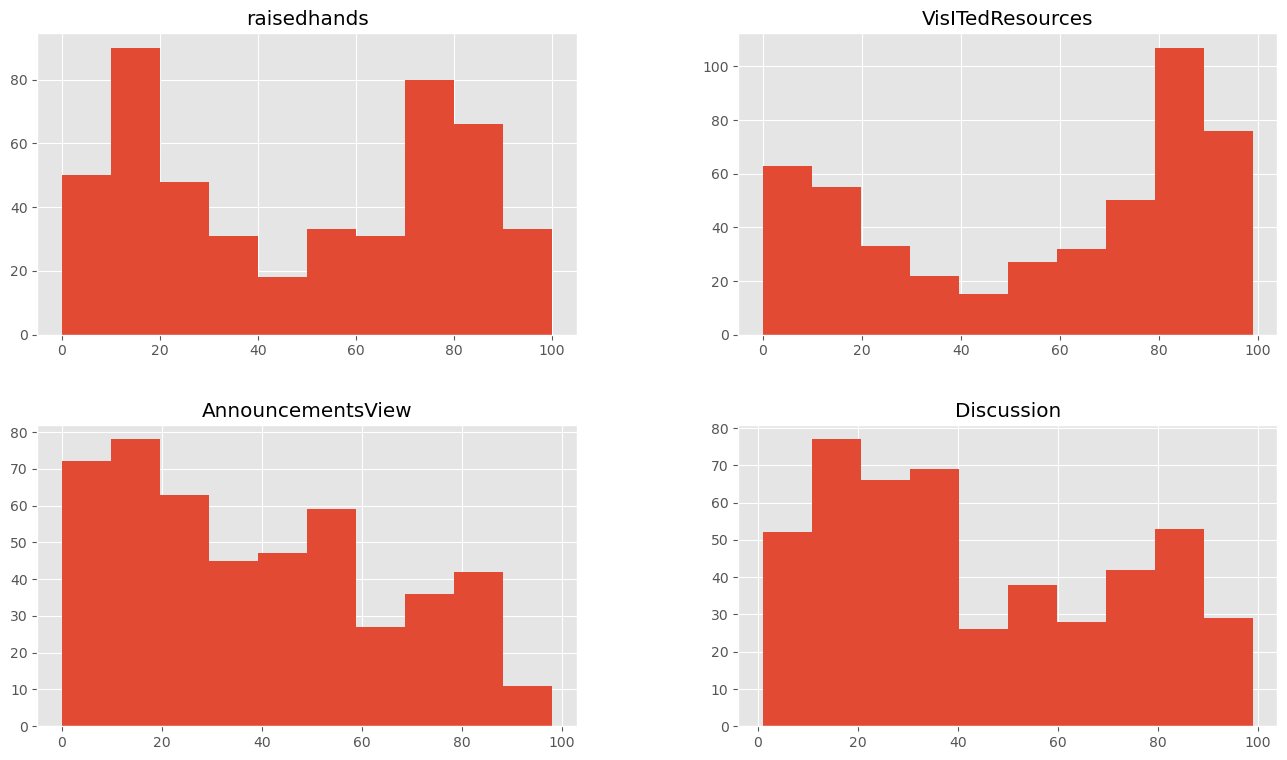

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
data.hist()
plt.show()

In [30]:
X = data[['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays']]


In [23]:
X.shape

(480, 16)

In [38]:
Y = data['Class']
#ya = data_datos["CALIFICACION"] 
Y.shape

(480,)

In [34]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [40]:
#particionando la data en 0.8 para entrenar y 0.2 para validar
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, Y, test_size=0.2, random_state=0)

print(X_trainset.shape, y_trainset.shape)
print (X_testset.shape, y_testset.shape)

(384, 16) (384,)
(96, 16) (96,)


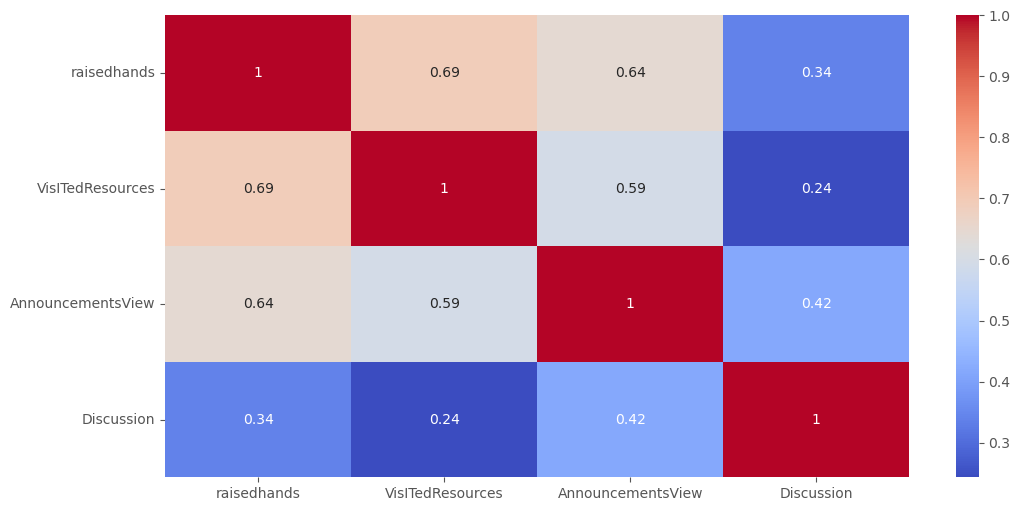

In [42]:
#correlacion de las variables
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr_df = numeric_data.corr(method='pearson')

# Visualizar el mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 6))
sns.heatmap(corr_df, annot=True, cmap="coolwarm")
plt.show()


In [44]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=150)
}
  
grid = GridSearchCV(GaussianNB(), 
                    param_grid, 
                    refit = True, 
                    verbose = 3, 
                    cv = 5)
  
# fitting the model for grid search
grid.fit(X_trainset, y_trainset)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END ...................var_smoothing=1.0;, score=nan total time=   0.0s
[CV 2/5] END ...................var_smoothing=1.0;, score=nan total time=   0.0s
[CV 3/5] END ...................var_smoothing=1.0;, score=nan total time=   0.0s
[CV 4/5] END ...................var_smoothing=1.0;, score=nan total time=   0.0s
[CV 5/5] END ...................var_smoothing=1.0;, score=nan total time=   0.0s
[CV 1/5] END ....var_smoothing=0.8701563933188907;, score=nan total time=   0.0s
[CV 2/5] END ....var_smoothing=0.8701563933188907;, score=nan total time=   0.0s
[CV 3/5] END ....var_smoothing=0.8701563933188907;, score=nan total time=   0.0s
[CV 4/5] END ....var_smoothing=0.8701563933188907;, score=nan total time=   0.0s
[CV 5/5] END ....var_smoothing=0.8701563933188907;, score=nan total time=   0.0s
[CV 1/5] END ....var_smoothing=0.7571721488337401;, score=nan total time=   0.0s
[CV 2/5] END ....var_smoothing=0.7571721488337

ValueError: 
All the 750 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
750 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rezero\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rezero\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rezero\anaconda3\Lib\site-packages\sklearn\naive_bayes.py", line 263, in fit
    return self._partial_fit(
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rezero\anaconda3\Lib\site-packages\sklearn\naive_bayes.py", line 423, in _partial_fit
    X, y = self._validate_data(X, y, reset=first_call)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rezero\anaconda3\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rezero\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Rezero\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rezero\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rezero\anaconda3\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'M'


In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


In [54]:
# Convertir las variables categóricas en numéricas usando pd.get_dummies()
X_trainset = pd.get_dummies(X_trainset, drop_first=True)
X_testset = pd.get_dummies(X_testset, drop_first=True)

# Asegurarse de que las columnas de X_trainset y X_testset sean consistentes
X_testset = X_testset.reindex(columns=X_trainset.columns, fill_value=0)

# Reentrena el modelo con los datos preprocesados
for i in range(2, 12):
    # Crear un objeto GridSearchCV con el valor actual de cv
    grid_search = GridSearchCV(classifier,
                               param_grid,
                               refit=True,
                               verbose=0,
                               cv=i)

    # Entrenar el modelo para buscar los mejores parámetros
    grid_search.fit(X_trainset, y_trainset)

    # Predecir con el mejor modelo encontrado
    pred_Y1 = grid_search.predict(X_testset)

    # Calcular las métricas de clasificación
    accuracy = accuracy_score(y_testset, pred_Y1)
    precision = precision_score(y_testset, pred_Y1, average='micro')
    recall = recall_score(y_testset, pred_Y1, average='micro')
    f1 = f1_score(y_testset, pred_Y1, average='micro')

    # Verificar si es posible calcular ROC AUC
    try:
        roc_auc = roc_auc_score(y_testset, grid_search.predict_proba(X_testset), multi_class='ovr', average='micro')
    except ValueError:
        roc_auc = None  # Si hay un error, asignar None

    matthews = matthews_corrcoef(y_testset, pred_Y1)

    # Guardar los resultados en la lista
    resultados.append({
        "cv": i,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 score": f1,
        "ROC AUC": roc_auc,
        "Matthews": matthews,
        "Predicciones": pred_Y1  # Guardar las predicciones para usar luego
    })

# Imprimir las métricas al final y generar visualizaciones como antes


cv: 2
Accuracy: 0.6458333333333334
Precision: 0.6458333333333334
Recall: 0.6458333333333334
F1 score: 0.6458333333333334
ROC AUC: 0.8591579861111112
Matthews: 0.48596597383143963


cv: 3
Accuracy: 0.6458333333333334
Precision: 0.6458333333333334
Recall: 0.6458333333333334
F1 score: 0.6458333333333334
ROC AUC: 0.8591579861111112
Matthews: 0.48596597383143963


cv: 4
Accuracy: 0.6458333333333334
Precision: 0.6458333333333334
Recall: 0.6458333333333334
F1 score: 0.6458333333333334
ROC AUC: 0.8591579861111112
Matthews: 0.48596597383143963


cv: 5
Accuracy: 0.6458333333333334
Precision: 0.6458333333333334
Recall: 0.6458333333333334
F1 score: 0.6458333333333334
ROC AUC: 0.8591579861111112
Matthews: 0.48596597383143963


cv: 6
Accuracy: 0.6458333333333334
Precision: 0.6458333333333334
Recall: 0.6458333333333334
F1 score: 0.6458333333333334
ROC AUC: 0.8591579861111112
Matthews: 0.48596597383143963


cv: 7
Accuracy: 0.6458333333333334
Precision: 0.6458333333333334
Recall: 0.6458333333333334
F1 

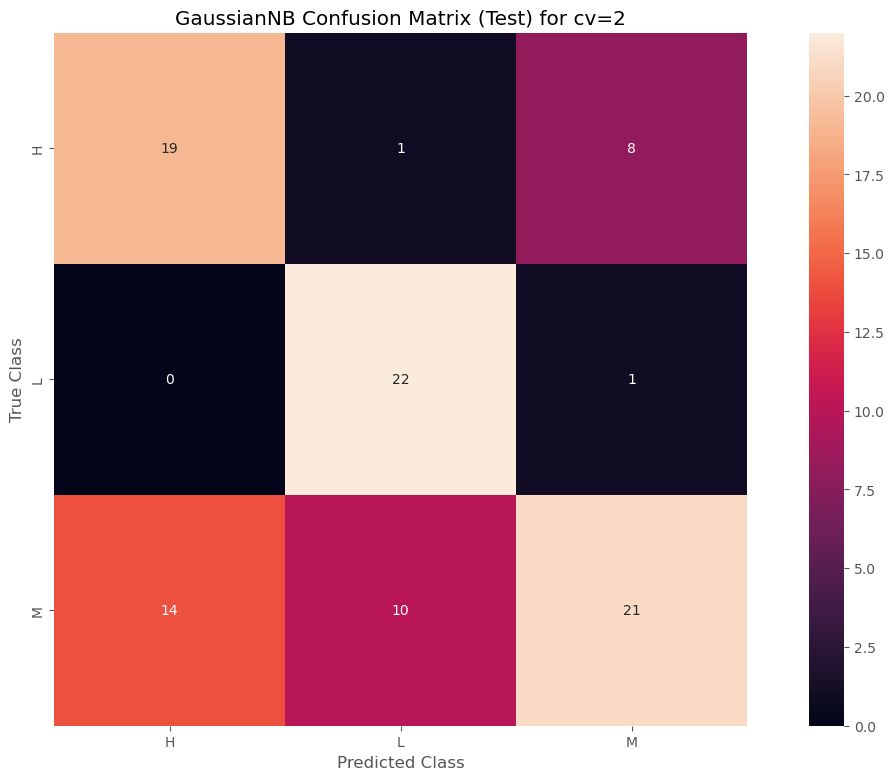

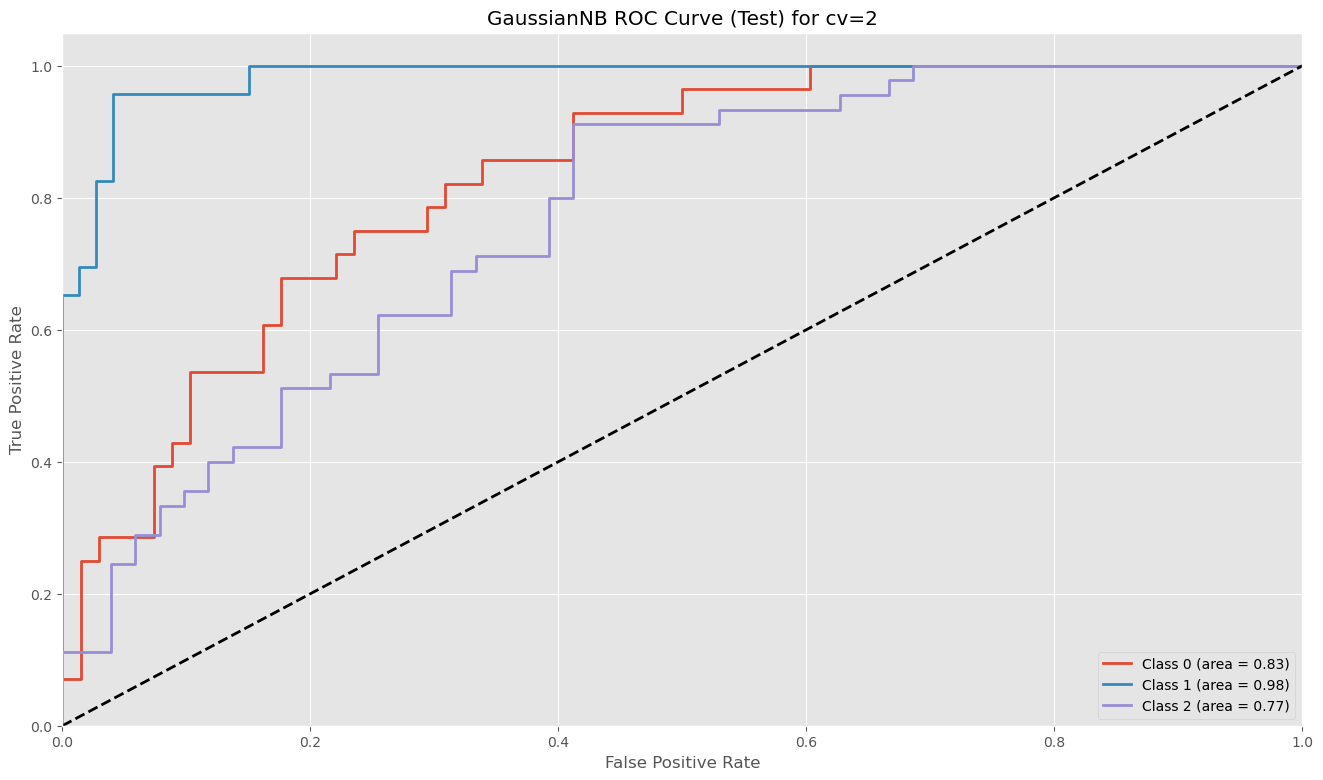

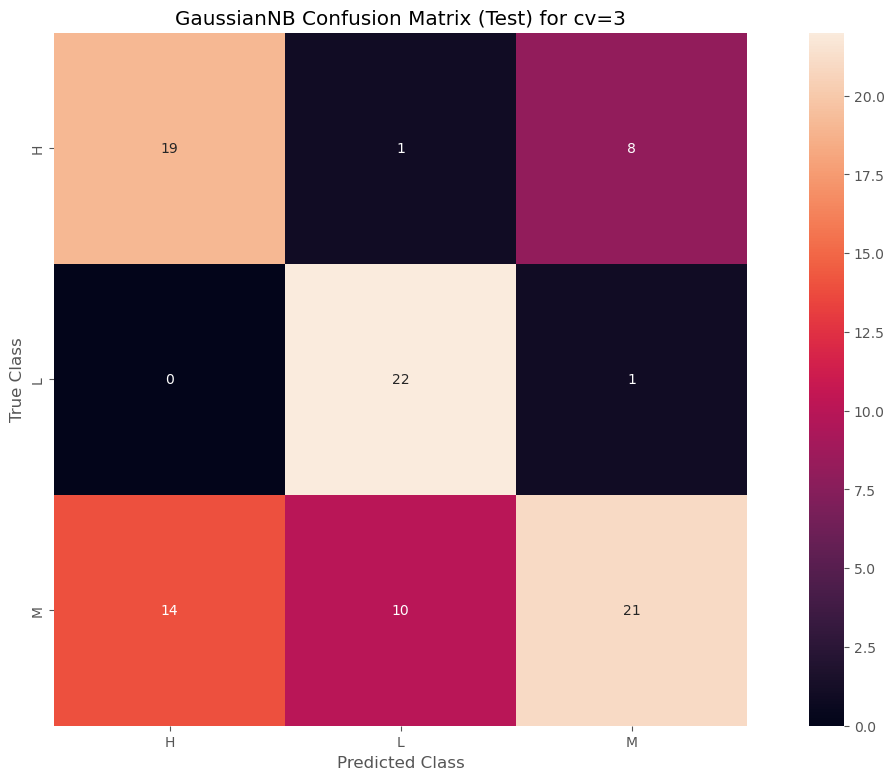

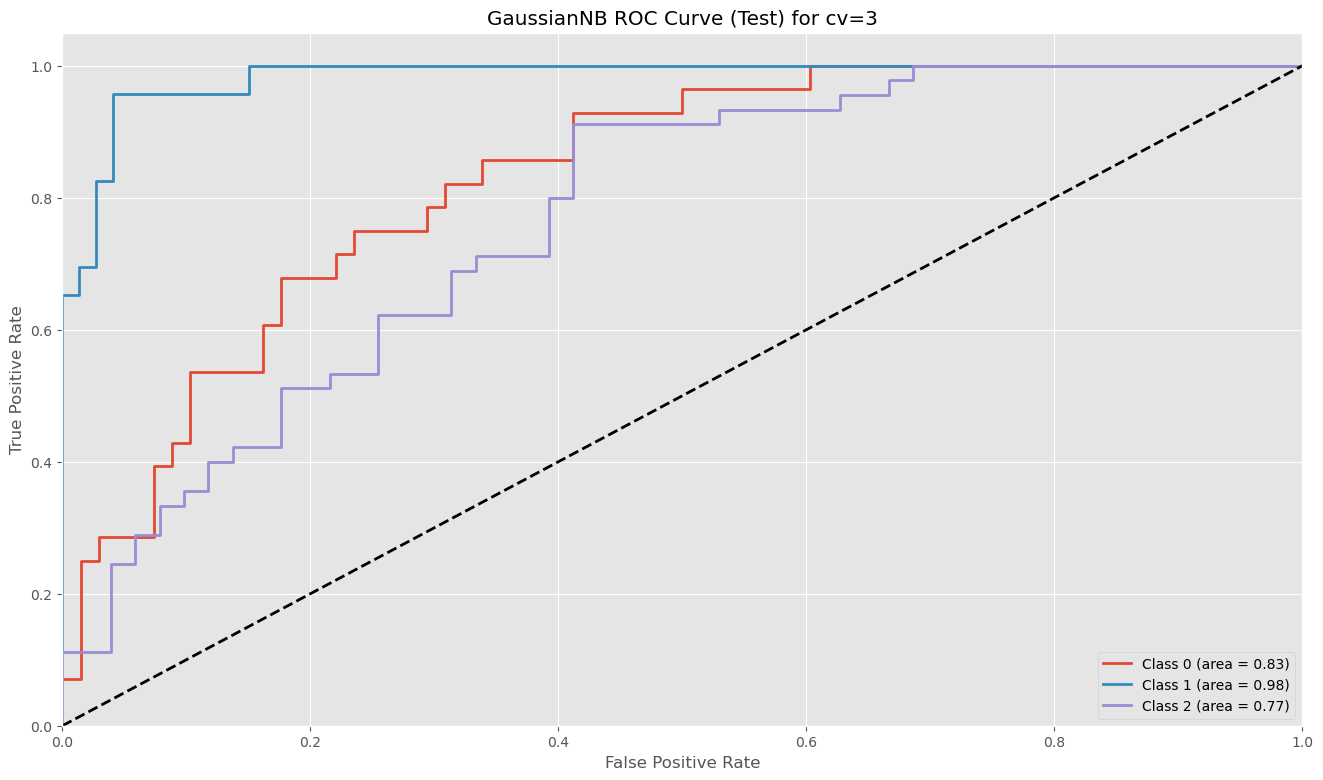

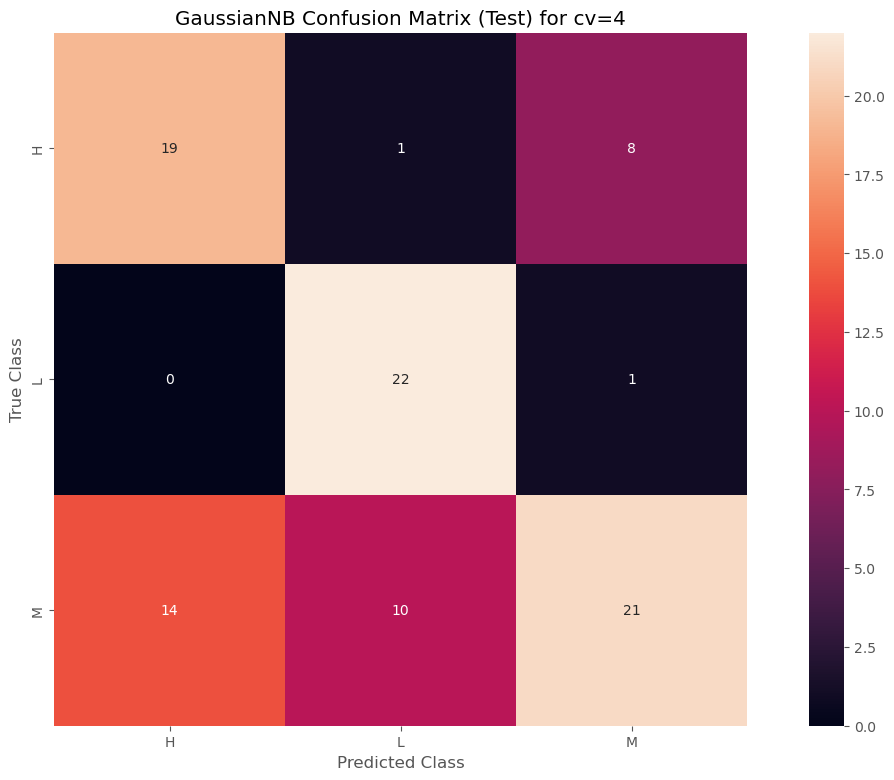

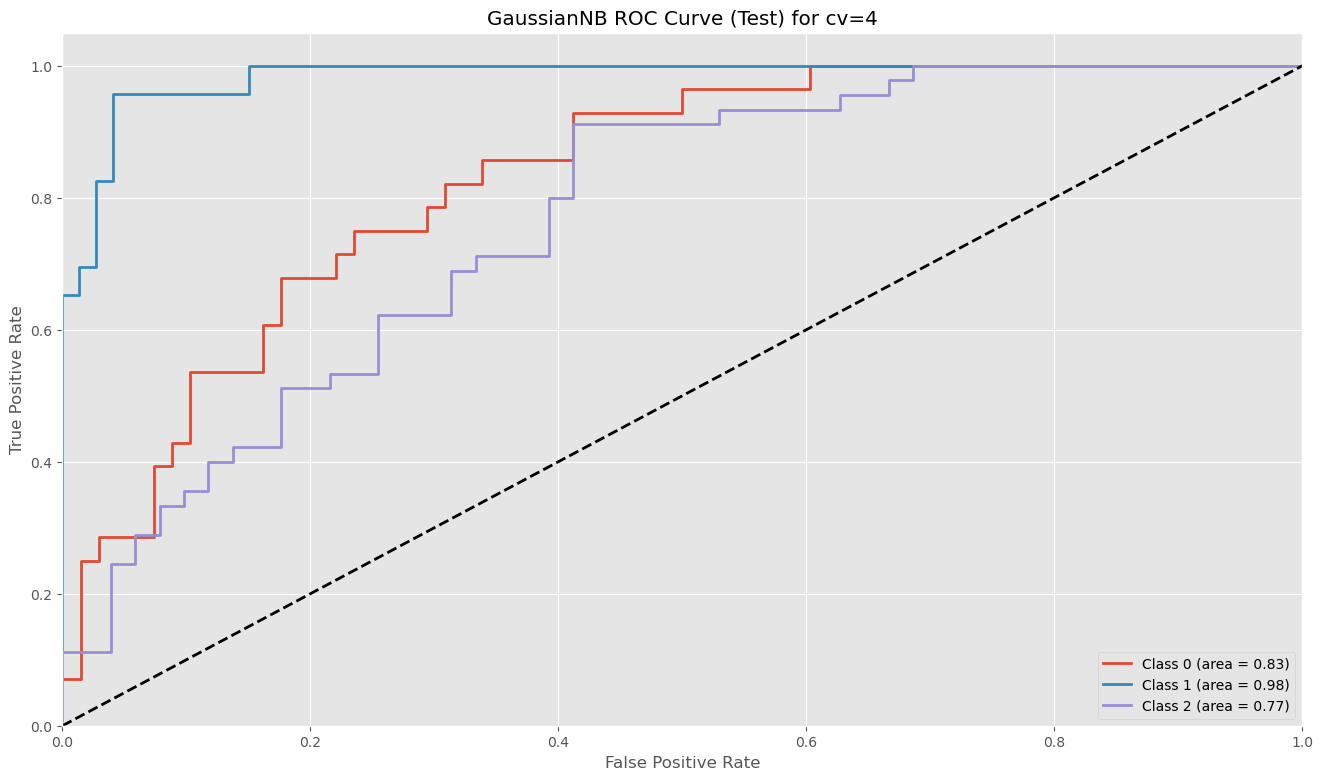

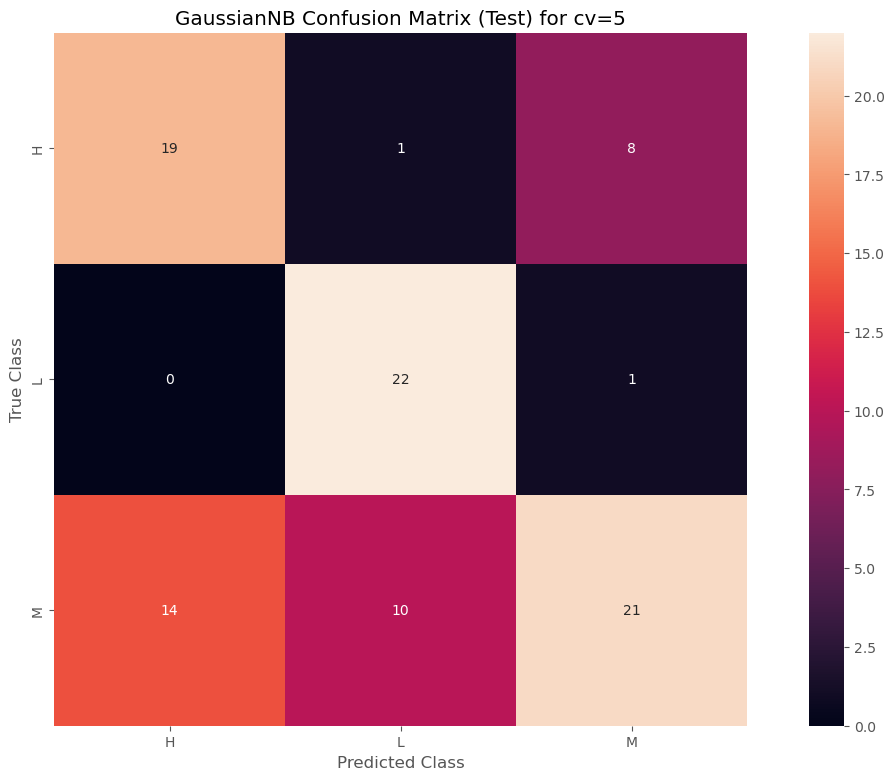

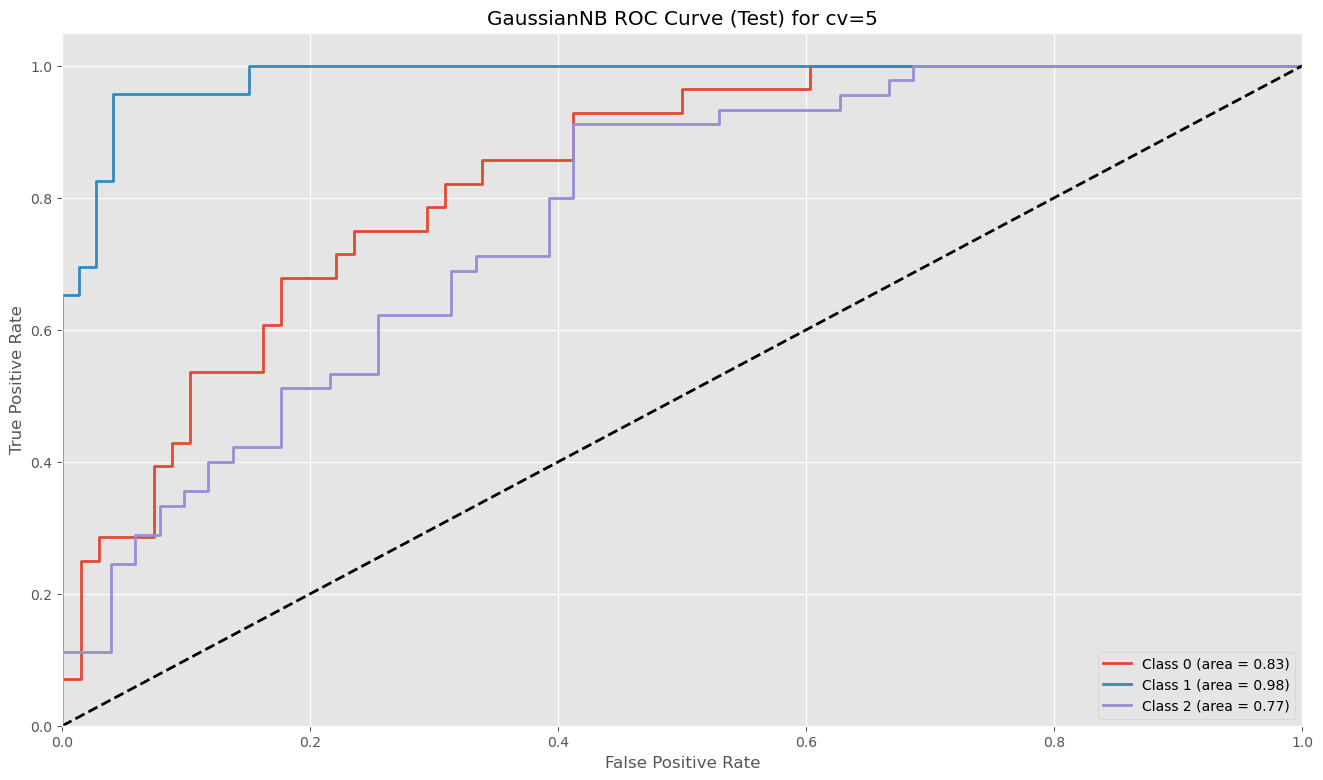

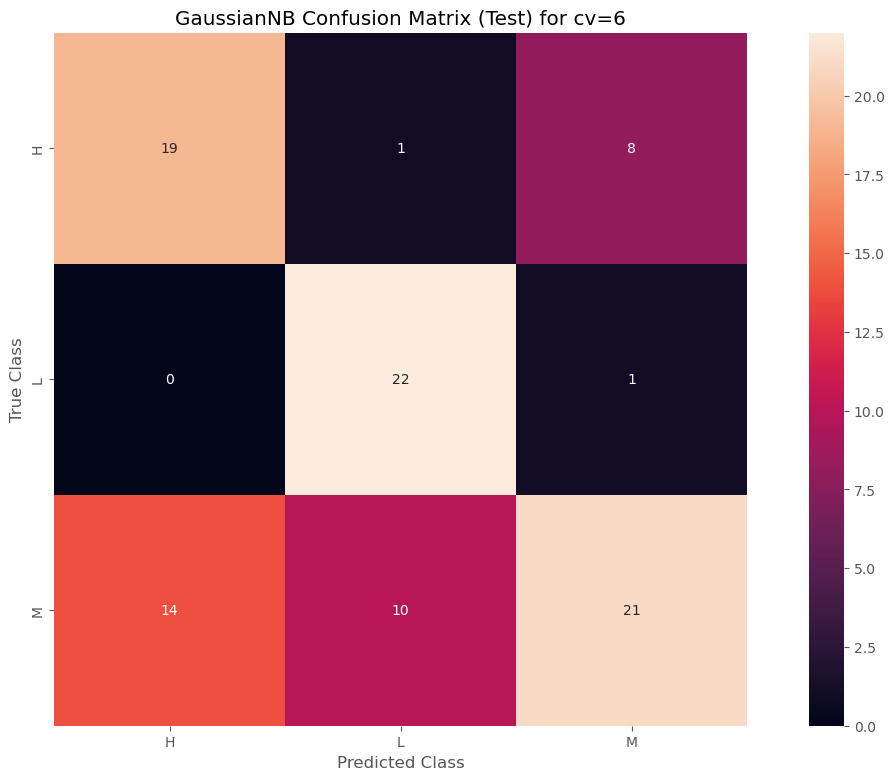

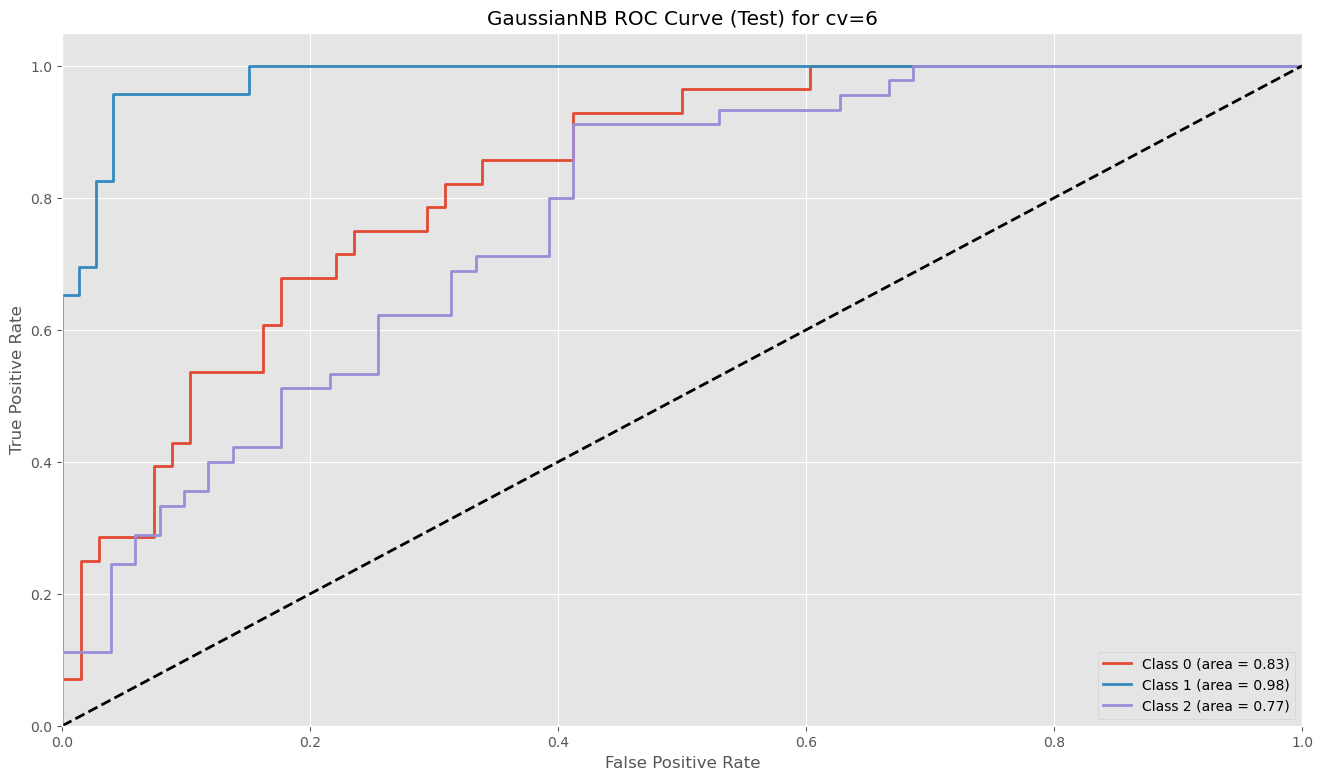

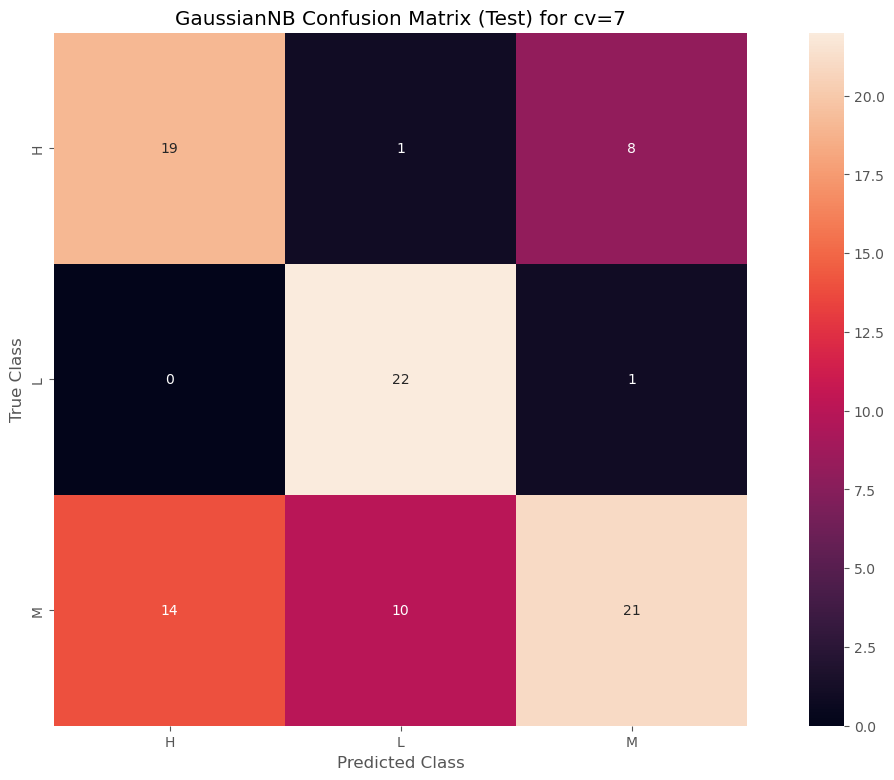

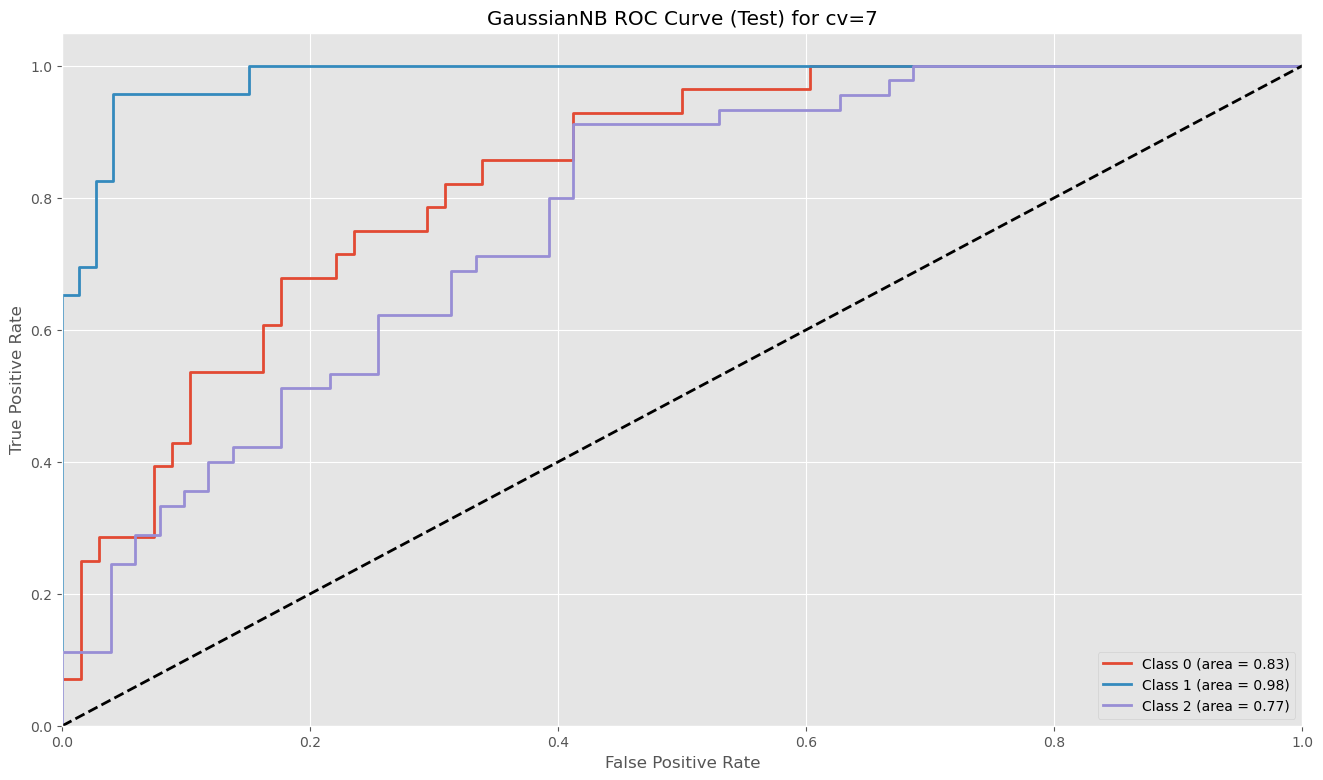

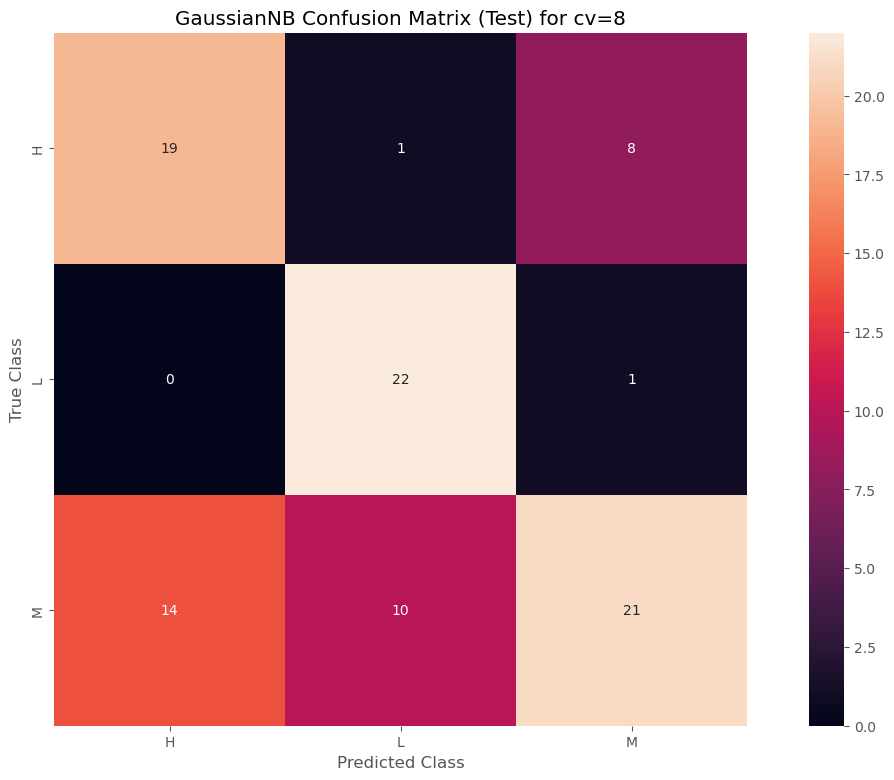

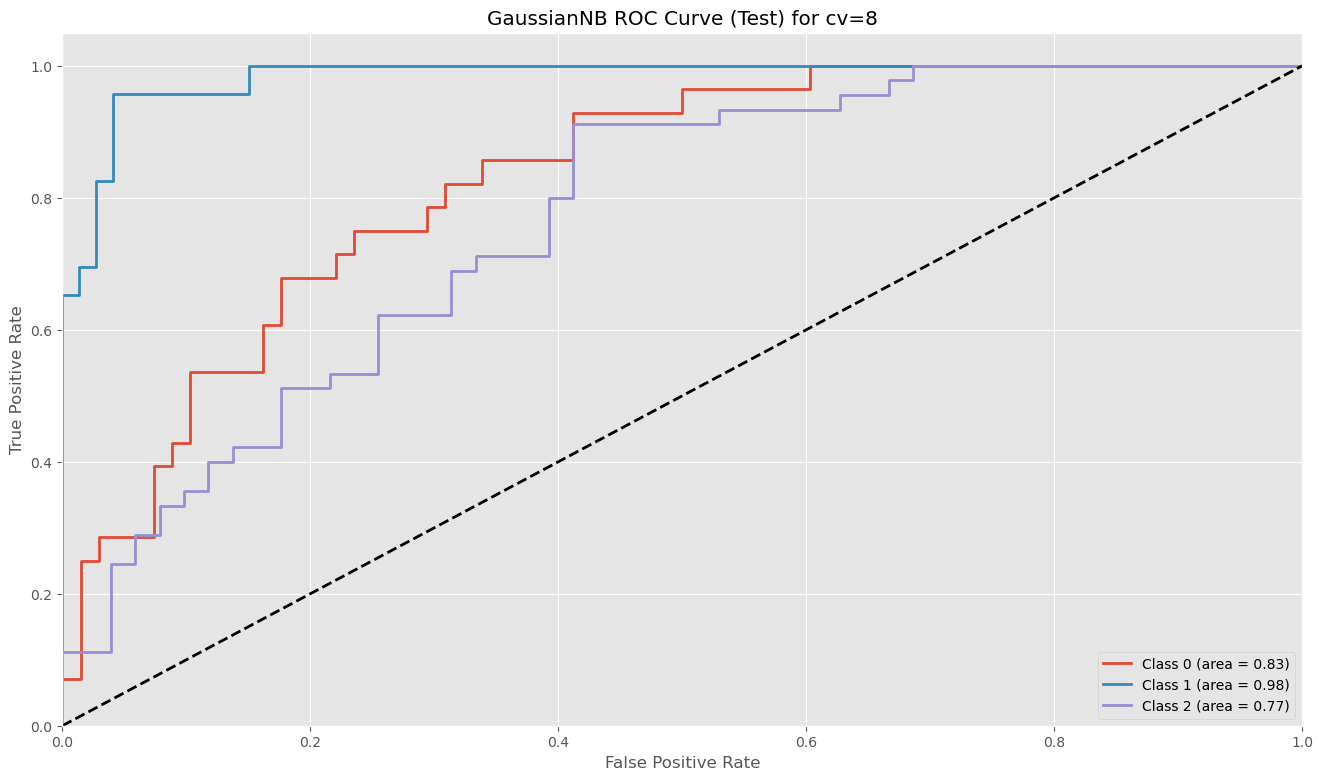

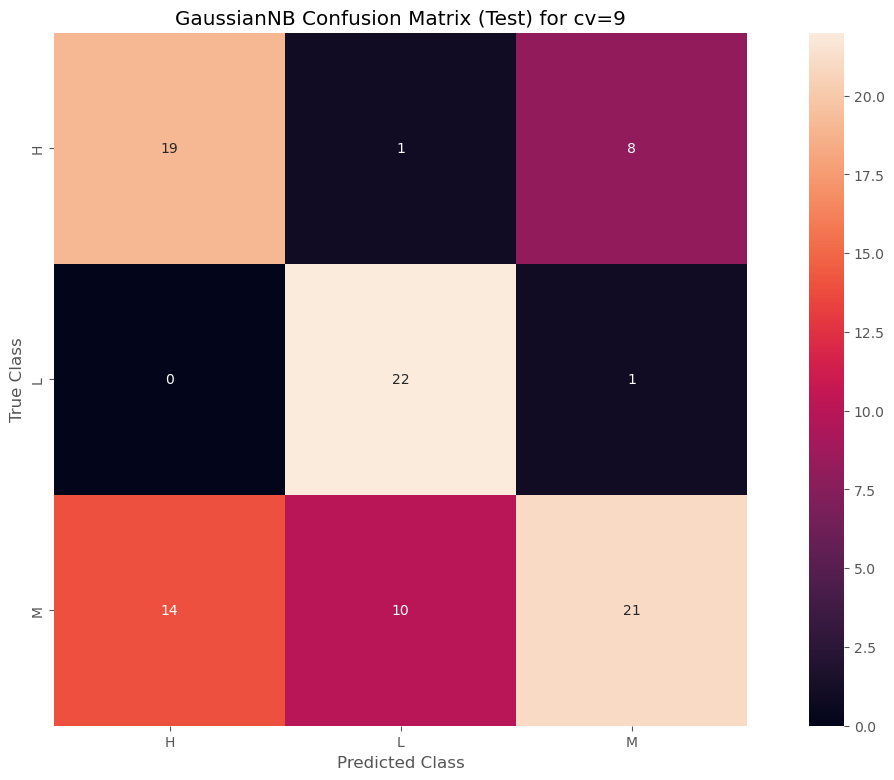

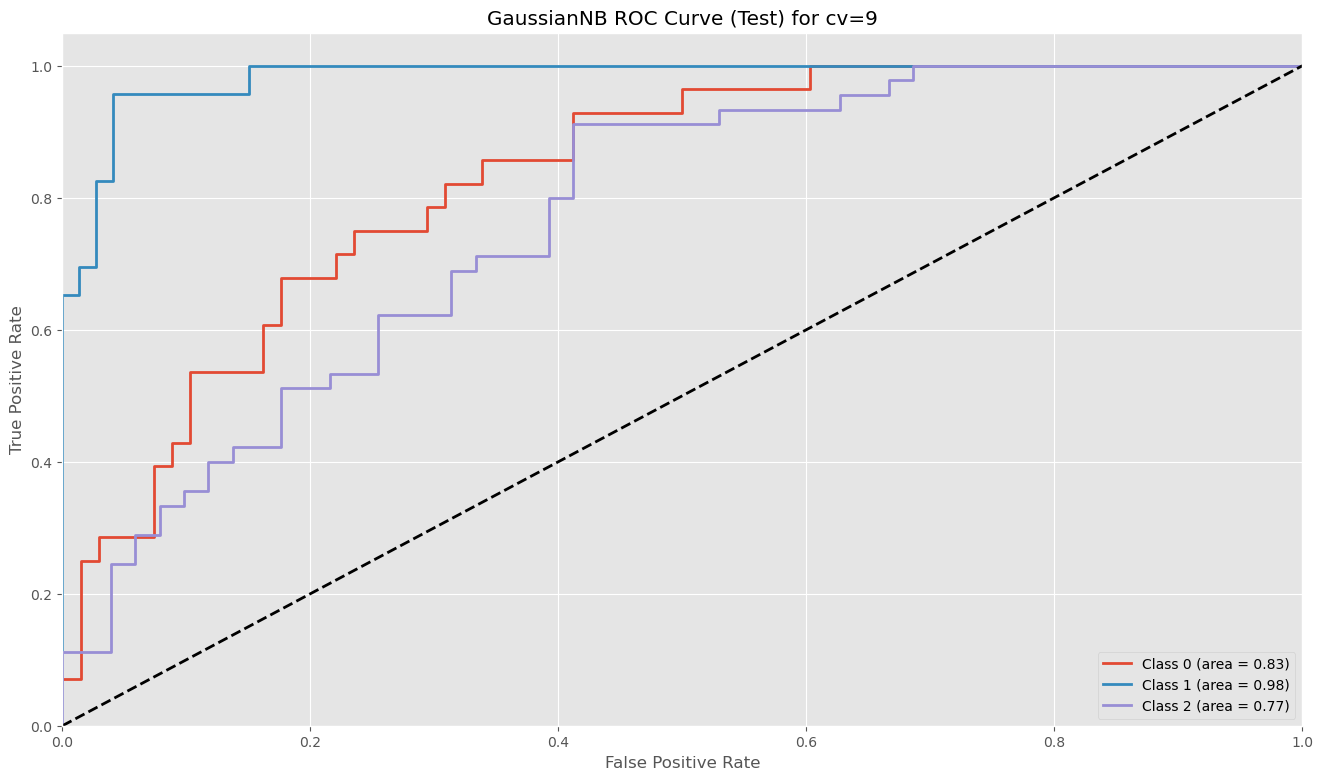

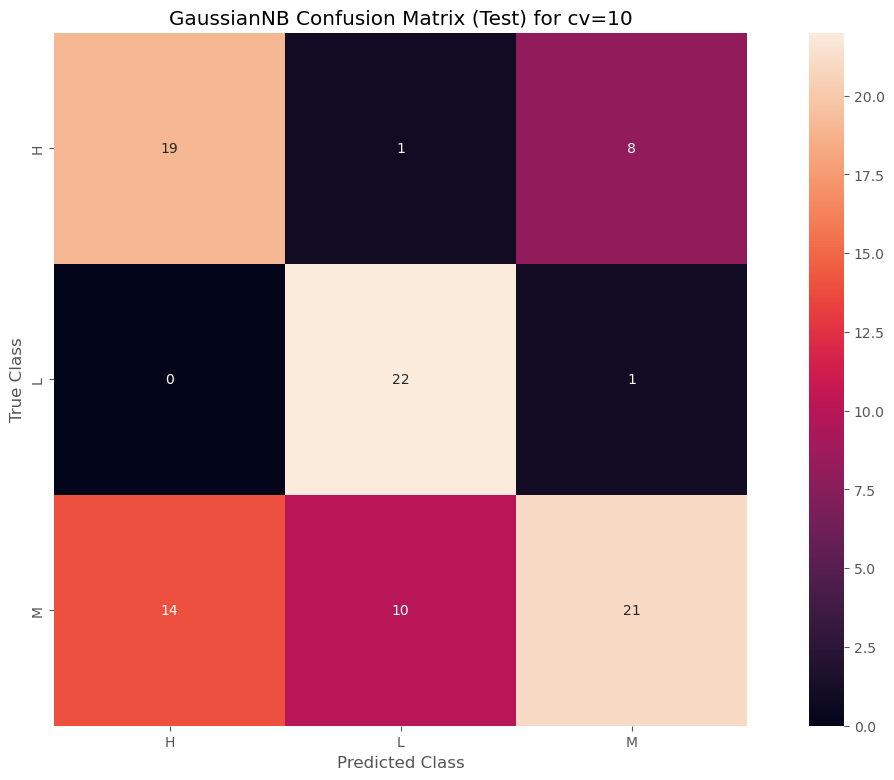

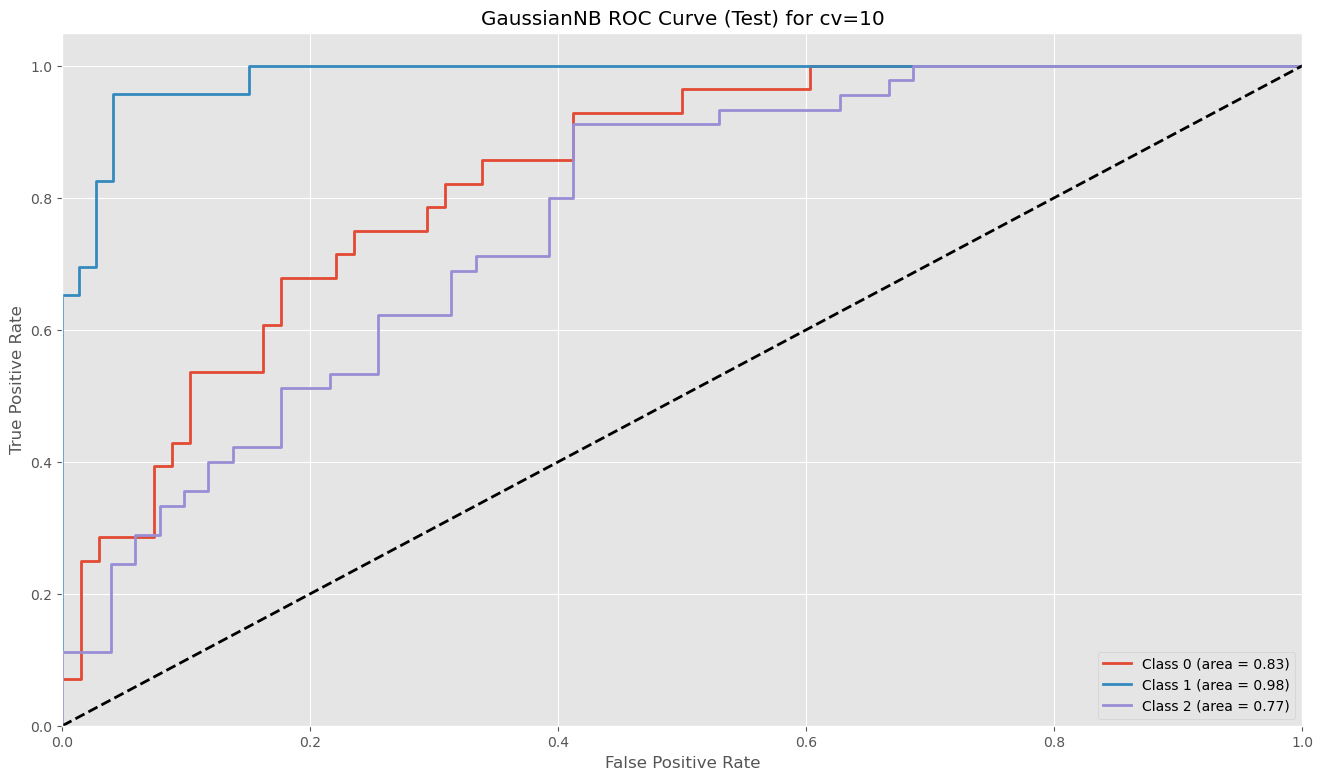

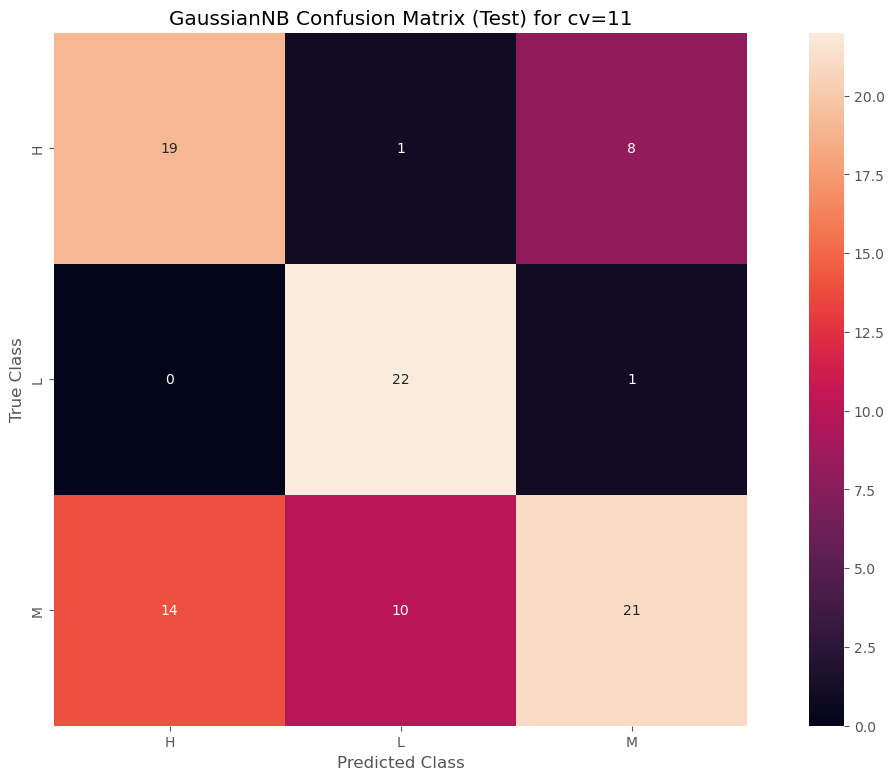

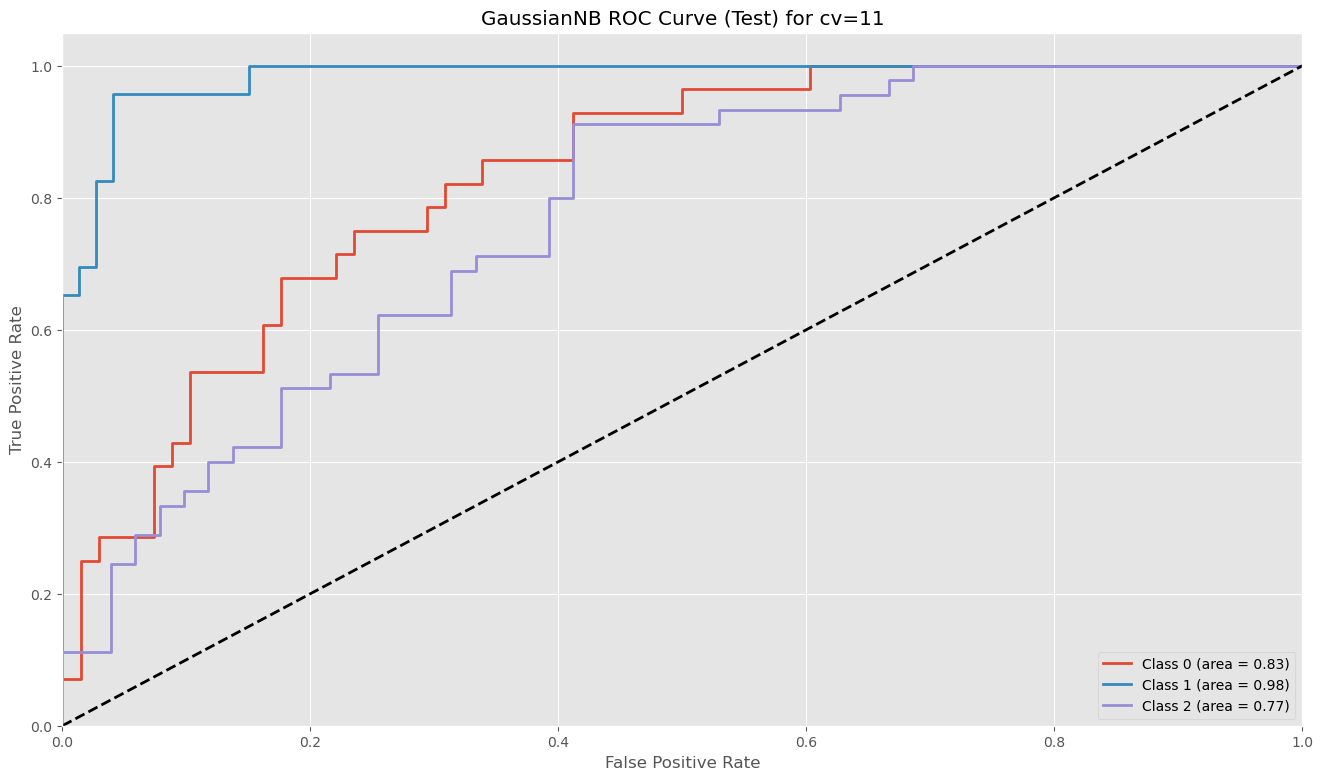

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, matthews_corrcoef
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Definiendo el clasificador bayesiano
classifier = GaussianNB()

# Parámetros para GridSearchCV (solo 'var_smoothing' se puede ajustar en GaussianNB)
param_grid = {
    'var_smoothing': np.logspace(-9, 0, 10)
}

# Lista para almacenar los resultados
resultados = []

for i in range(2, 12):
    # Crear un objeto GridSearchCV con el valor actual de cv
    grid_search = GridSearchCV(classifier,
                               param_grid,
                               refit=True,
                               verbose=0,
                               cv=i)

    # Entrenar el modelo para buscar los mejores parámetros
    grid_search.fit(X_trainset, y_trainset)

    # Predecir con el mejor modelo encontrado
    pred_Y1 = grid_search.predict(X_testset)

    # Calcular las métricas de clasificación
    accuracy = accuracy_score(y_testset, pred_Y1)
    precision = precision_score(y_testset, pred_Y1, average='micro')
    recall = recall_score(y_testset, pred_Y1, average='micro')
    f1 = f1_score(y_testset, pred_Y1, average='micro')

    # Verificar si es posible calcular ROC AUC
    try:
        roc_auc = roc_auc_score(y_testset, grid_search.predict_proba(X_testset), multi_class='ovr', average='micro')
    except ValueError:
        roc_auc = None  # Si hay un error, asignar None

    matthews = matthews_corrcoef(y_testset, pred_Y1)

    # Guardar los resultados en la lista
    resultados.append({
        "cv": i,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 score": f1,
        "ROC AUC": roc_auc,
        "Matthews": matthews,
        "Predicciones": pred_Y1  # Guardar las predicciones para usar luego
    })

# Imprimir las métricas al final
for resultado in resultados:
    print(f"cv: {resultado['cv']}")
    print("Accuracy:", resultado["Accuracy"])
    print("Precision:", resultado["Precision"])
    print("Recall:", resultado["Recall"])
    print("F1 score:", resultado["F1 score"])
    print("ROC AUC:", resultado["ROC AUC"] if resultado["ROC AUC"] is not None else "N/A")
    print("Matthews:", resultado["Matthews"])
    print("\n")

# Generar las matrices de confusión y curvas ROC al final
for resultado in resultados:
    # Matriz de confusión
    cnf_matrix = pd.crosstab(y_testset, resultado['Predicciones'], rownames=['ACTUAL'], colnames=['Prediccion'])
    sb.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title(f'GaussianNB Confusion Matrix (Test) for cv={resultado["cv"]}')
    plt.show()

    # Curva ROC
    try:
        y_prob = grid_search.predict_proba(X_testset)
        y_test_bin = label_binarize(y_testset, classes=np.unique(y_testset))

        n_classes = y_test_bin.shape[1]

        plt.figure()
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'Class {i} (area = {roc_auc:0.2f})')

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'GaussianNB ROC Curve (Test) for cv={resultado["cv"]}')
        plt.legend(loc="lower right")
        plt.show()

    except ValueError as e:
        print(f"Error al generar la curva ROC para cv={resultado['cv']}: {e}")


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, matthews_corrcoef
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Definiendo el clasificador bayesiano
classifier = GaussianNB()

# Parámetros para GridSearchCV (solo 'var_smoothing' se puede ajustar en GaussianNB)
param_grid = {
    'var_smoothing': np.logspace(-9, 0, 10)
}

# Lista para almacenar los resultados
resultados = []

for i in range(2, 12):
    # Crear un objeto GridSearchCV con el valor actual de cv
    grid_search = GridSearchCV(classifier,
                               param_grid,
                               refit=True,
                               verbose=0,
                               cv=i)

    # Entrenar el modelo para buscar los mejores parámetros
    grid_search.fit(X_trainset, y_trainset)

    # Predecir con el mejor modelo encontrado
    pred_Y1 = grid_search.predict(X_testset)

    # Calcular las métricas de clasificación
    accuracy = accuracy_score(y_testset, pred_Y1)
    precision = precision_score(y_testset, pred_Y1, average='micro')
    recall = recall_score(y_testset, pred_Y1, average='micro')
    f1 = f1_score(y_testset, pred_Y1, average='micro')

    # Verificar si es posible calcular ROC AUC
    try:
        roc_auc = roc_auc_score(y_testset, grid_search.predict_proba(X_testset), multi_class='ovr', average='micro')
    except ValueError:
        roc_auc = None  # Si hay un error, asignar None

    matthews = matthews_corrcoef(y_testset, pred_Y1)

    # Guardar los resultados en la lista
    resultados.append({
        "cv": i,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 score": f1,
        "ROC AUC": roc_auc,
        "Matthews": matthews,
        "Predicciones": pred_Y1  # Guardar las predicciones para usar luego
    })

# Imprimir las métricas al final
for resultado in resultados:
    print(f"cv: {resultado['cv']}")
    print("Accuracy:", resultado["Accuracy"])
    print("Precision:", resultado["Precision"])
    print("Recall:", resultado["Recall"])
    print("F1 score:", resultado["F1 score"])
    print("ROC AUC:", resultado["ROC AUC"] if resultado["ROC AUC"] is not None else "N/A")
    print("Matthews:", resultado["Matthews"])
    print("\n")

# Generar las matrices de confusión y curvas ROC al final
for resultado in resultados:
    # Matriz de confusión
    cnf_matrix = pd.crosstab(y_testset, resultado['Predicciones'], rownames=['ACTUAL'], colnames=['Prediccion'])
    sb.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title(f'GaussianNB Confusion Matrix (Test) for cv={resultado["cv"]}')
    plt.show()

    # Curva ROC
    try:
        y_prob = grid_search.predict_proba(X_testset)
        y_test_bin = label_binarize(y_testset, classes=np.unique(y_testset))

        n_classes = y_test_bin.shape[1]

        plt.figure()
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'Class {i} (area = {roc_auc:0.2f})')

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'GaussianNB ROC Curve (Test) for cv={resultado["cv"]}')
        plt.legend(loc="lower right")
        plt.show()

    except ValueError as e:
        print(f"Error al generar la curva ROC para cv={resultado['cv']}: {e}")


ValueError: 
All the 20 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rezero\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rezero\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rezero\anaconda3\Lib\site-packages\sklearn\naive_bayes.py", line 263, in fit
    return self._partial_fit(
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rezero\anaconda3\Lib\site-packages\sklearn\naive_bayes.py", line 423, in _partial_fit
    X, y = self._validate_data(X, y, reset=first_call)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rezero\anaconda3\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rezero\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Rezero\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rezero\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rezero\anaconda3\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'F'

--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rezero\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rezero\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rezero\anaconda3\Lib\site-packages\sklearn\naive_bayes.py", line 263, in fit
    return self._partial_fit(
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rezero\anaconda3\Lib\site-packages\sklearn\naive_bayes.py", line 423, in _partial_fit
    X, y = self._validate_data(X, y, reset=first_call)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rezero\anaconda3\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rezero\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Rezero\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rezero\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rezero\anaconda3\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'M'


In [65]:
print("Inicio de la evaluación...")
for resultado in resultados:
    print(f"Procesando cv={resultado['cv']}...")  # Mensaje de progreso

    # Matriz de confusión
    try:
        cnf_matrix = pd.crosstab(y_testset, resultado['Predicciones'], rownames=['ACTUAL'], colnames=['Prediccion'])
        sb.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True)
        plt.xlabel('Predicted Class')
        plt.ylabel('True Class')
        plt.title(f'GaussianNB Confusion Matrix (Test) for cv={resultado["cv"]}')
        plt.show()
        print(f"Matriz de confusión para cv={resultado['cv']} mostrada.")

    except ValueError as e:
        print(f"Error al generar la matriz de confusión para cv={resultado['cv']}: {e}")

    # Curva ROC
    try:
        y_prob = grid_search.predict_proba(X_testset)
        y_test_bin = label_binarize(y_testset, classes=np.unique(y_testset))

        n_classes = y_test_bin.shape[1]

        plt.figure()
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'Class {i} (area = {roc_auc:0.2f})')

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'GaussianNB ROC Curve (Test) for cv={resultado["cv"]}')
        plt.legend(loc="lower right")
        plt.show()
        print(f"Curva ROC para cv={resultado['cv']} mostrada.")

    except ValueError as e:
        print(f"Error al generar la curva ROC para cv={resultado['cv']}: {e}")

print("Evaluación completada.")



Inicio de la evaluación...
Evaluación completada.


In [59]:


 # Reset indices of training datasets to ensure compatibility with StratifiedKFold indices
X_trainset = X_trainset.reset_index(drop=True)
y_trainset = y_trainset.reset_index(drop=True)

# Define the structure of your Bayesian Network (update these names to match X_trainset's actual columns)
structure = [('feature1', 'target'), ('feature2', 'target'), ('feature3', 'target')]

# Build the Bayesian Network model with the defined structure
model = BayesianNetwork(structure)

# Store results
results = []

# Start cross-validation with different folds
for cv in range(2, 12):
    skf = StratifiedKFold(n_splits=cv)
    
    # Iterate over each cross-validation fold
    for train_index, test_index in skf.split(X_trainset, y_trainset):
        X_train, X_test = X_trainset.iloc[train_index], X_trainset.iloc[test_index]
        y_train, y_test = y_trainset.iloc[train_index], y_trainset.iloc[test_index]
        
        # Combine X_train and y_train into a single DataFrame for pgmpy
        train_data = pd.concat([X_train, y_train], axis=1)
        
        # Check columns in train_data
        print("Train data columns:", train_data.columns)

        # Fit the Bayesian Network using Maximum Likelihood Estimation
        model.fit(train_data, estimator=MaximumLikelihoodEstimator)

        # Predict classes on the test set
        test_data = X_test.copy()
        test_data['target'] = y_test  # Adding the target column for pgmpy to use
        pred_y = model.predict(test_data.drop(columns=['target']))['target']
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, pred_y)
        precision = precision_score(y_test, pred_y, average='micro')
        recall = recall_score(y_test, pred_y, average='micro')
        f1 = f1_score(y_test, pred_y, average='micro')
        matthews = matthews_corrcoef(y_test, pred_y)

        # Store results
        results.append({
            "cv": cv,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 score": f1,
            "Matthews": matthews,
            "Predictions": pred_y,
            "y_test": y_test  # Store the test labels for confusion matrix
        })

# Display results
for result in results:
    print(f"cv: {result['cv']}")
    print("Accuracy:", result["Accuracy"])
    print("Precision:", result["Precision"])
    print("Recall:", result["Recall"])
    print("F1 score:", result["F1 score"])
    print("Matthews:", result["Matthews"])
    print("\n")

# Generate confusion matrices for each cross-validation fold
for result in results:
    # Confusion matrix
    cnf_matrix = confusion_matrix(result['y_test'], result['Predictions'])
    sb.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title(f'Bayesian Network Confusion Matrix (Test) for cv={result["cv"]}')
    plt.show()


Train data columns: Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')


KeyError: 'feature1'

In [92]:
print(grid.best_params_)

{'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 50}


In [93]:
model = grid.best_estimator_
model

RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=50)

In [104]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Convierte las variables categóricas en variables numéricas
X_trainset = pd.get_dummies(X_trainset, drop_first=True)

# Define el modelo




In [116]:
pred = model.predict(X_trainset)

In [118]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [120]:
#Metricas del modelo
from sklearn.metrics import accuracy_score
print('el accuracy es :',accuracy_score(y_trainset, pred))

#Recall - sensibilidad
from sklearn.metrics import recall_score
print ('la sensibilidad es : ',recall_score(y_trainset, pred, average='macro'))

#f1_score
from sklearn.metrics import f1_score
print('el f1_score es: ', f1_score(y_trainset, pred, average='macro'))

#precision
from sklearn.metrics import precision_score
print('la precision es :',precision_score(y_trainset, pred, average='macro'))

el accuracy es : 1.0
la sensibilidad es :  1.0
el f1_score es:  1.0
la precision es : 1.0


In [122]:
print(classification_report(y_trainset, pred))

              precision    recall  f1-score   support

           H       1.00      1.00      1.00       114
           L       1.00      1.00      1.00       104
           M       1.00      1.00      1.00       166

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



In [124]:
matrix_de_confussion = pd.crosstab(y_trainset, pred, rownames = ['ACTUAL'],colnames=['PREDICCION'])
print(matrix_de_confussion)

PREDICCION    H    L    M
ACTUAL                   
H           114    0    0
L             0  104    0
M             0    0  166


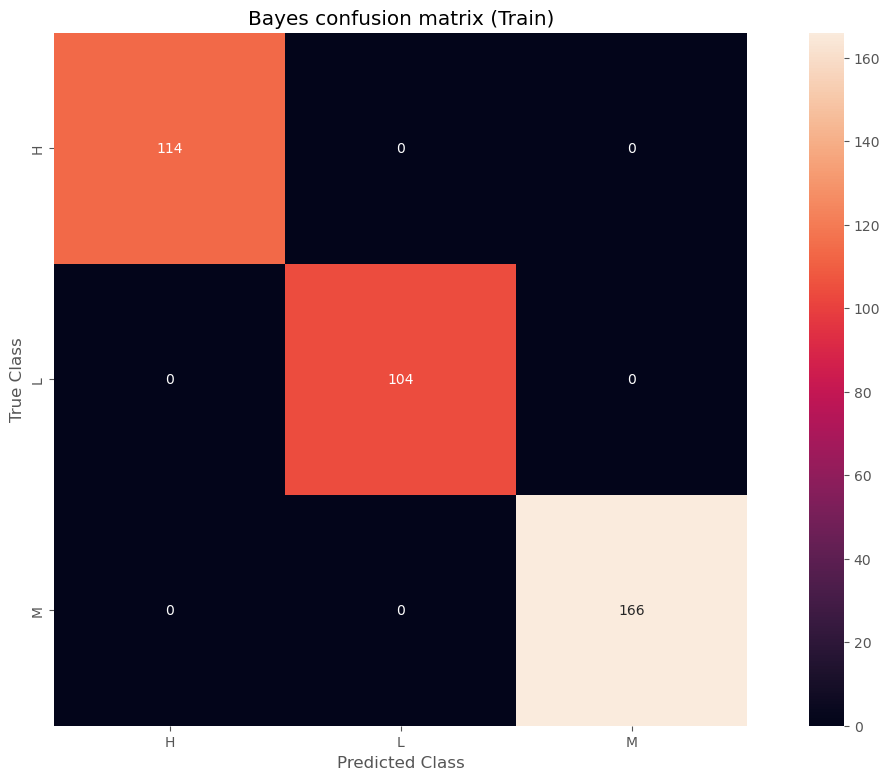

In [126]:
cnf_matrix= pd.crosstab(y_trainset, pred, rownames = ['ACTUAL'],colnames=['Prediccion'])
sb.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Bayes confusion matrix (Train)')
plt.rcParams["figure.figsize"] = (5, 5)
plt.show()

In [164]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

# Hacer predicciones en el conjunto de prueba
pred = model.predict(X_testset)

# Calcular y mostrar las métricas, incluyendo `zero_division` en `precision_score`
print("El accuracy es:", accuracy_score(y_testset, pred))
print("La sensibilidad es:", recall_score(y_testset, pred, average='macro'))
print("El f1_score es:", f1_score(y_testset, pred, average='macro'))
print("La precisión es:", precision_score(y_testset, pred, average='macro', zero_division=1))  # Cambia 1 por 0 según prefieras


El accuracy es: 0.6041666666666666
La sensibilidad es: 0.5855072463768116
El f1_score es: 0.48412698412698413
La precisión es: 0.746031746031746


In [168]:
from sklearn.metrics import classification_report

# Generar el reporte de clasificación con el parámetro `zero_division`
print(classification_report(y_testset, pred, zero_division=1))  # Cambia 1 a 0 según prefieras


              precision    recall  f1-score   support

           H       1.00      0.00      0.00        28
           L       0.67      0.96      0.79        23
           M       0.57      0.80      0.67        45

    accuracy                           0.60        96
   macro avg       0.75      0.59      0.48        96
weighted avg       0.72      0.60      0.50        96



In [170]:
matrix_de_confussion = pd.crosstab(y_testset, pred, rownames = ['ACTUAL'],colnames=['PREDICCION'])
print(matrix_de_confussion)

PREDICCION   L   M
ACTUAL            
H            2  26
L           22   1
M            9  36


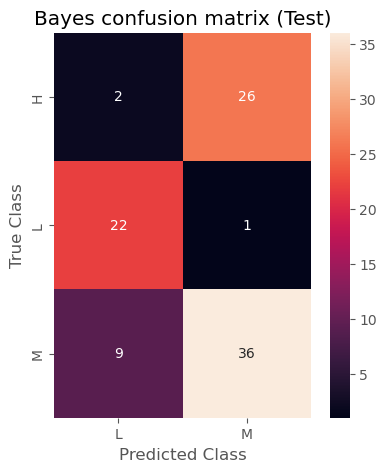

In [172]:
cnf_matrix= pd.crosstab(y_testset, pred, rownames = ['ACTUAL'],colnames=['Prediccion'])
sb.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Bayes confusion matrix (Test)')
plt.rcParams["figure.figsize"] = (5, 5)
plt.show()

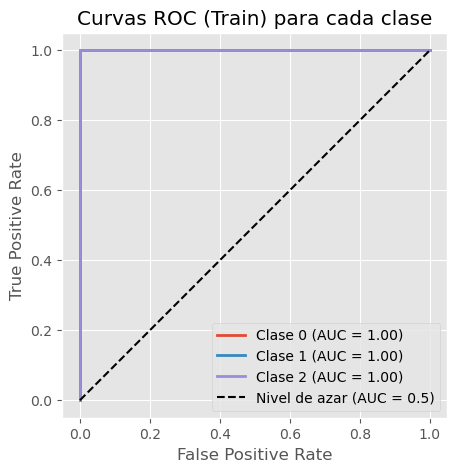

In [178]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Asegúrate de que `probs` contenga probabilidades para cada clase
probs = model.predict_proba(X_trainset)
# Binarizar las etiquetas (One-vs-Rest)
y_train_binarized = label_binarize(y_trainset, classes=np.unique(y_trainset))
n_classes = y_train_binarized.shape[1]

# Calcular curvas ROC para cada clase
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_train_binarized[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

# Agregar línea de azar
plt.plot([0, 1], [0, 1], "k--", label="Nivel de azar (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC (Train) para cada clase")
plt.legend()
plt.show()



In [195]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarizar las etiquetas en One-vs-Rest para obtener una matriz de clases binarias
y_test_binarized = label_binarize(y_testset, classes=np.unique(y_testset))
n_classes = y_test_binarized.shape[1]

# Obtener las probabilidades de predicción para cada clase


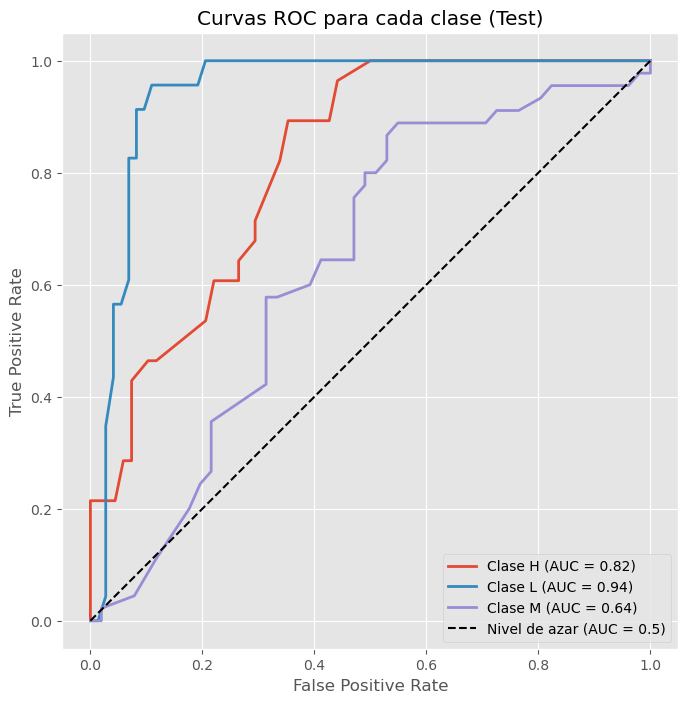

In [205]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarizar las etiquetas (One-vs-Rest) para el problema multiclase
y_test_binarized = label_binarize(y_testset, classes=np.unique(y_testset))
n_classes = y_test_binarized.shape[1]

# Obtener las probabilidades de predicción para cada clase
probs = model.predict_proba(X_testset)

# Graficar la curva ROC para cada clase
plt.figure(figsize=(8, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {np.unique(y_testset)[i]} (AUC = {roc_auc:.2f})")

# Agregar línea de azar
plt.plot([0, 1], [0, 1], "k--", label="Nivel de azar (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC para cada clase (Test)")
plt.legend()
plt.show()





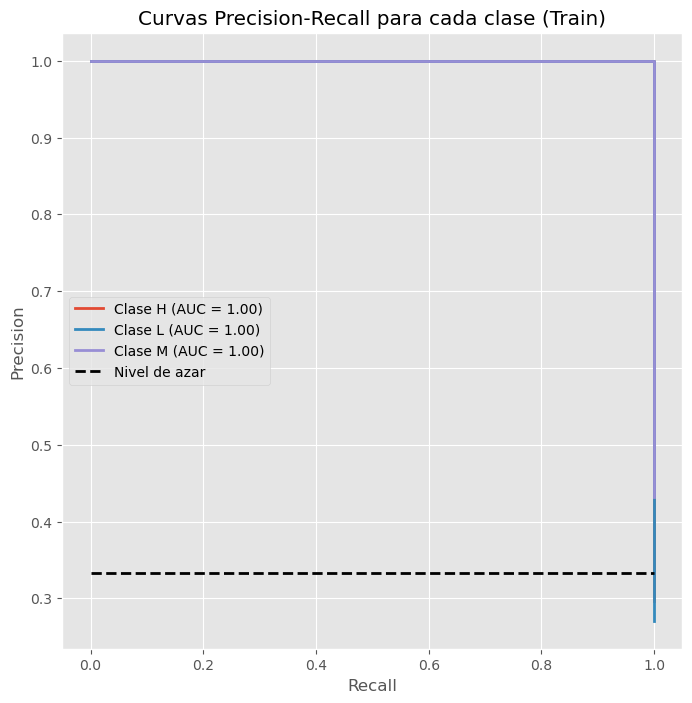

In [213]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarizar las etiquetas en One-vs-Rest para el problema multiclase
y_train_binarized = label_binarize(y_trainset, classes=np.unique(y_trainset))
n_classes = y_train_binarized.shape[1]

# Obtener las probabilidades de predicción para cada clase
probs = model.predict_proba(X_trainset)

# Graficar la curva Precision-Recall para cada clase
plt.figure(figsize=(8, 8))
for i in range(n_classes):
    lr_precision, lr_recall, _ = precision_recall_curve(y_train_binarized[:, i], probs[:, i])
    pr_auc = auc(lr_recall, lr_precision)
    plt.plot(lr_recall, lr_precision, lw=2, label=f"Clase {np.unique(y_trainset)[i]} (AUC = {pr_auc:.2f})")

# Línea de "sin habilidad"
no_skill = y_train_binarized.mean()
plt.plot([0, 1], [no_skill, no_skill], 'k--', lw=2, label="Nivel de azar")

# Etiquetas y leyenda
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curvas Precision-Recall para cada clase (Train)')
plt.legend(loc='best')
plt.show()


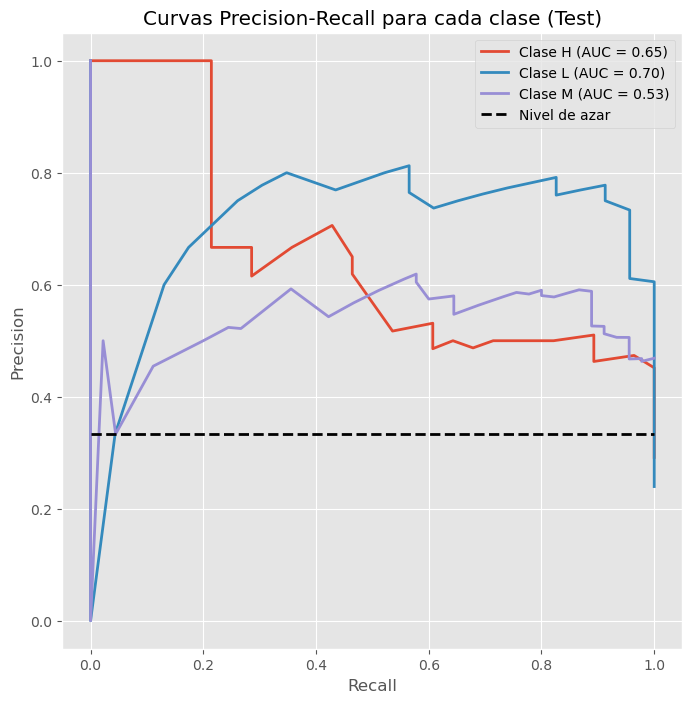

In [221]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarizar las etiquetas para cada clase (One-vs-Rest)
y_test_binarized = label_binarize(y_testset, classes=np.unique(y_testset))
n_classes = y_test_binarized.shape[1]

# Obtener las probabilidades de predicción para cada clase
probs = model.predict_proba(X_testset)

# Graficar la curva Precision-Recall para cada clase
plt.figure(figsize=(8, 8))
for i in range(n_classes):
    lr_precision, lr_recall, _ = precision_recall_curve(y_test_binarized[:, i], probs[:, i])
    pr_auc = auc(lr_recall, lr_precision)
    plt.plot(lr_recall, lr_precision, lw=2, label=f"Clase {np.unique(y_testset)[i]} (AUC = {pr_auc:.2f})")

# Línea de "sin habilidad"
no_skill = y_test_binarized.mean()
plt.plot([0, 1], [no_skill, no_skill], 'k--', lw=2, label="Nivel de azar")

# Etiquetas y leyenda
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curvas Precision-Recall para cada clase (Test)')
plt.legend(loc='best')
plt.show()

